In [4]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers, optimizers   


In [5]:
train_dir = "DermMel/train"
test_dir = "DermMel/Test"
val_dir = "DermMel/Valid"

In [6]:
image_size =(224,224)
batch_size = 32

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

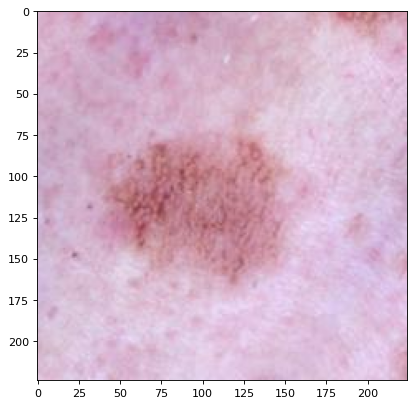

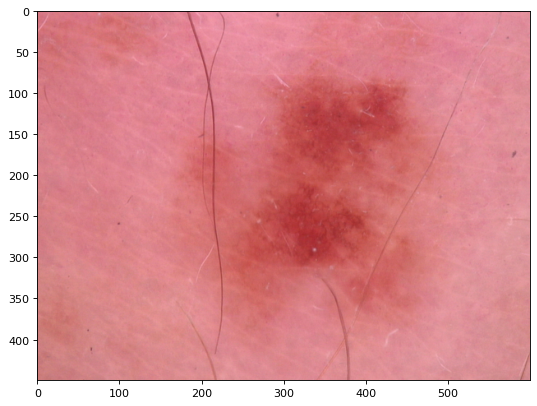

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

img = mpimg.imread("DermMel/test/Melanoma/AUG_0_11.jpeg")
imgplot = plt.imshow(img)

plt.show()

figure(figsize=(8, 6), dpi=80)
img = mpimg.imread("DermMel/test/NotMelanoma/ISIC_0024307.jpg")
imgplot = plt.imshow(img)

plt.show()

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=50,
                                   width_shift_range=0.5,
                                   height_shift_range=0.5,
                                   shear_range=0.7,
                                   zoom_range=0.7,
                                   fill_mode='nearest'
                                   )

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 10682 images belonging to 2 classes.


In [11]:
valid_generator = valid_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 3562 images belonging to 2 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

Found 3561 images belonging to 2 classes.


In [13]:
print(train_generator.class_indices)

{'Melanoma': 0, 'NotMelanoma': 1}


In [14]:
print(train_generator.class_mode)

binary


In [15]:
class_count = np.unique(train_generator.classes, return_counts=True)[1]
print(class_count)
total_samples = np.sum(class_count)
print(total_samples)
class_weights = {0: total_samples / (2.0 * class_count[0]),
                 1: total_samples / (2.0 * class_count[1])}
print(class_weights)

[5341 5341]
10682
{0: 1.0, 1: 1.0}


In [16]:
base_model = InceptionV3(weights='imagenet', 
                         include_top=False, 
                         input_shape=(224, 224, 3)
                         )


In [17]:
print(base_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [18]:
for layers in base_model.layers:
    layers.trainable = False

In [19]:
from keras import layers

In [20]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 48,018,209
Trainable params: 26,215,425
No

In [22]:

history = model.fit(train_generator,
                    steps_per_epoch=300,
                    epochs=50,
                    class_weight=class_weights,
                    validation_data=valid_generator,
                    validation_steps=100)

Epoch 1/50
300/300 [==============================] - 112s 350ms/step - loss: 1.3648 - accuracy: 0.7750 - val_loss: 0.4336 - val_accuracy: 0.7997
Epoch 2/50
300/300 [==============================] - 104s 348ms/step - loss: 0.3654 - accuracy: 0.8425 - val_loss: 0.3887 - val_accuracy: 0.8363
Epoch 3/50
300/300 [==============================] - 106s 353ms/step - loss: 0.3405 - accuracy: 0.8577 - val_loss: 0.3117 - val_accuracy: 0.8694
Epoch 4/50
300/300 [==============================] - 103s 344ms/step - loss: 0.3356 - accuracy: 0.8544 - val_loss: 0.3777 - val_accuracy: 0.8494
Epoch 5/50
300/300 [==============================] - 106s 352ms/step - loss: 0.3378 - accuracy: 0.8594 - val_loss: 0.3226 - val_accuracy: 0.8616
Epoch 6/50
300/300 [==============================] - 106s 352ms/step - loss: 0.3241 - accuracy: 0.8679 - val_loss: 0.3082 - val_accuracy: 0.8703
Epoch 7/50
300/300 [==============================] - 106s 352ms/step - loss: 0.3026 - accuracy: 0.8689 - val_loss: 0.3562 -

In [29]:
model.save('iv3_model_v2.h5')

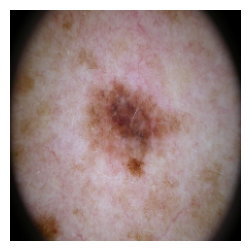

1/1 [==============================] - 1s 1s/step
Not Melanoma
Predicted Value: 0.64319164
----------------------------------------


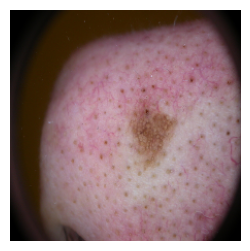

1/1 [==============================] - 0s 31ms/step
Not Melanoma
Predicted Value: 0.9887439
----------------------------------------


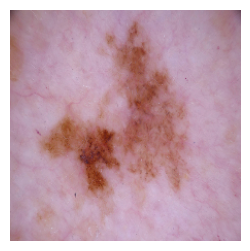

1/1 [==============================] - 0s 32ms/step
Not Melanoma
Predicted Value: 0.6932634
----------------------------------------


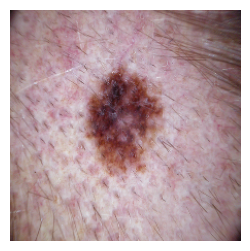

1/1 [==============================] - 0s 39ms/step
Not Melanoma
Predicted Value: 0.6932634
----------------------------------------


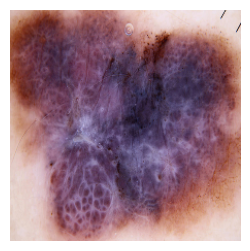

1/1 [==============================] - 0s 31ms/step
Melanoma
Predicted Value: 0.47733474
----------------------------------------


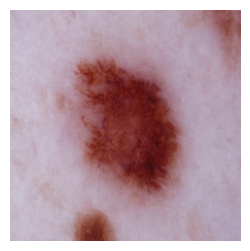

1/1 [==============================] - 0s 41ms/step
Not Melanoma
Predicted Value: 0.72782433
----------------------------------------


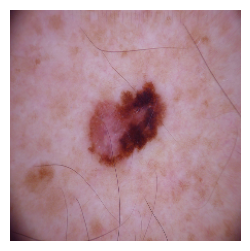

1/1 [==============================] - 0s 41ms/step
Melanoma
Predicted Value: 0.49182555
----------------------------------------


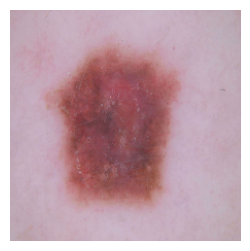

1/1 [==============================] - 0s 43ms/step
Not Melanoma
Predicted Value: 0.74254435
----------------------------------------


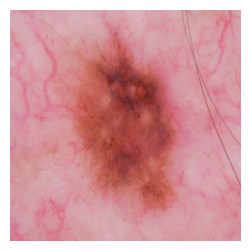

1/1 [==============================] - 0s 35ms/step
Not Melanoma
Predicted Value: 0.7240244
----------------------------------------


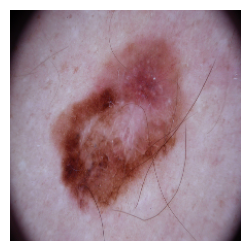

1/1 [==============================] - 0s 34ms/step
Not Melanoma
Predicted Value: 0.7507489
----------------------------------------


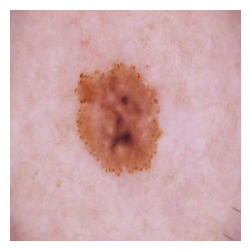

1/1 [==============================] - 0s 46ms/step
Not Melanoma
Predicted Value: 0.7795775
----------------------------------------


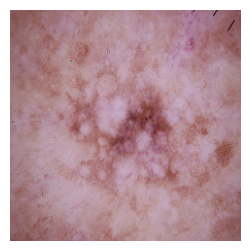

1/1 [==============================] - 0s 45ms/step
Not Melanoma
Predicted Value: 0.8575287
----------------------------------------


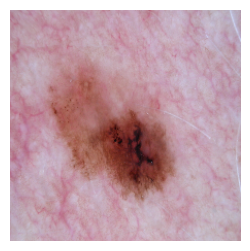

1/1 [==============================] - 0s 44ms/step
Not Melanoma
Predicted Value: 0.87406063
----------------------------------------


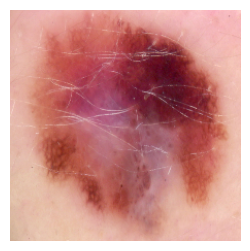

1/1 [==============================] - 0s 40ms/step
Not Melanoma
Predicted Value: 0.9960514
----------------------------------------


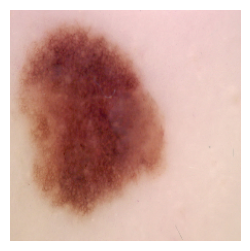

1/1 [==============================] - 0s 46ms/step
Not Melanoma
Predicted Value: 0.9256165
----------------------------------------


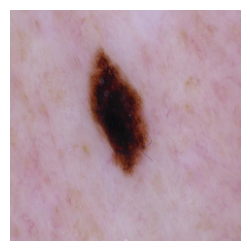

1/1 [==============================] - 0s 35ms/step
Not Melanoma
Predicted Value: 0.8275755
----------------------------------------


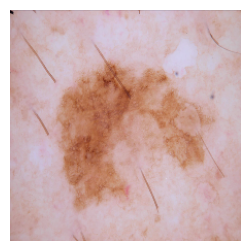

1/1 [==============================] - 0s 30ms/step
Not Melanoma
Predicted Value: 0.87381595
----------------------------------------


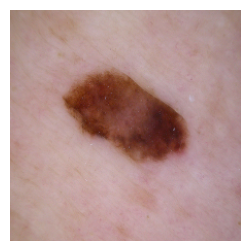

1/1 [==============================] - 0s 36ms/step
Not Melanoma
Predicted Value: 0.8814958
----------------------------------------


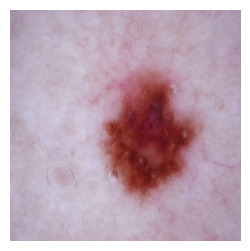

1/1 [==============================] - 0s 41ms/step
Not Melanoma
Predicted Value: 0.71929157
----------------------------------------


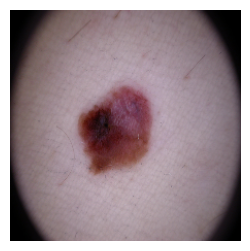

1/1 [==============================] - 0s 35ms/step
Melanoma
Predicted Value: 0.45768943
----------------------------------------


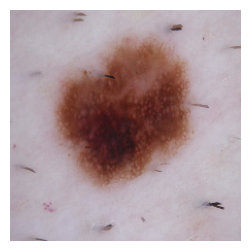

1/1 [==============================] - 0s 65ms/step
Not Melanoma
Predicted Value: 0.76847464
----------------------------------------


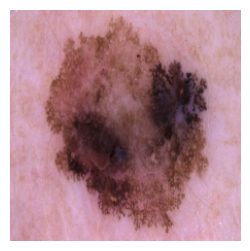

1/1 [==============================] - 0s 35ms/step
Melanoma
Predicted Value: 0.5145186
----------------------------------------


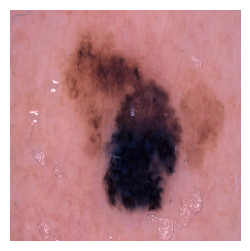

1/1 [==============================] - 0s 48ms/step
Melanoma
Predicted Value: 0.2991615
----------------------------------------


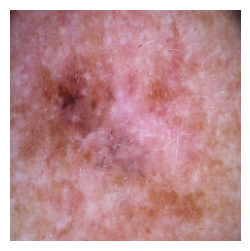

1/1 [==============================] - 0s 39ms/step
Not Melanoma
Predicted Value: 0.6932634
----------------------------------------


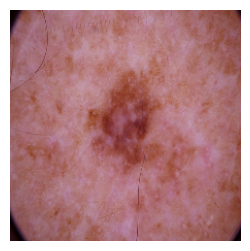

1/1 [==============================] - 0s 37ms/step
Melanoma
Predicted Value: 0.26827854
----------------------------------------


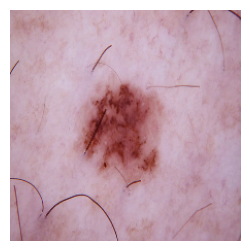

1/1 [==============================] - 0s 31ms/step
Not Melanoma
Predicted Value: 0.9970235
----------------------------------------


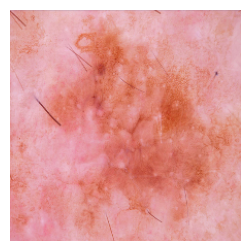

1/1 [==============================] - 0s 38ms/step
Not Melanoma
Predicted Value: 0.9982529
----------------------------------------


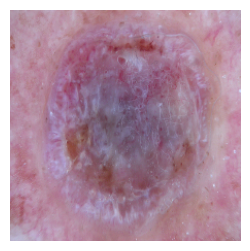

1/1 [==============================] - 0s 67ms/step
Not Melanoma
Predicted Value: 0.9931839
----------------------------------------


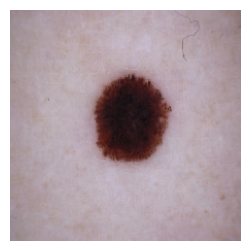

1/1 [==============================] - 0s 33ms/step
Not Melanoma
Predicted Value: 0.8763194
----------------------------------------


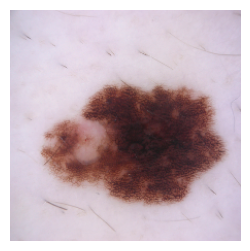

1/1 [==============================] - 0s 39ms/step
Not Melanoma
Predicted Value: 0.9208052
----------------------------------------


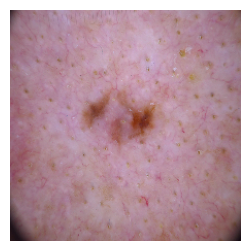

1/1 [==============================] - 0s 65ms/step
Not Melanoma
Predicted Value: 0.94999695
----------------------------------------


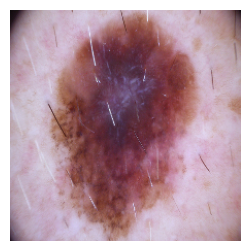

1/1 [==============================] - 0s 42ms/step
Not Melanoma
Predicted Value: 0.87241983
----------------------------------------


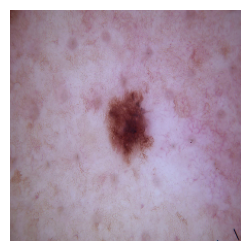

1/1 [==============================] - 0s 46ms/step
Not Melanoma
Predicted Value: 0.6932634
----------------------------------------


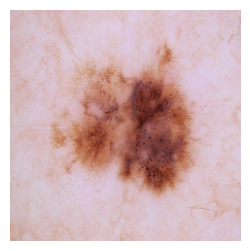

1/1 [==============================] - 0s 42ms/step
Not Melanoma
Predicted Value: 0.73434556
----------------------------------------


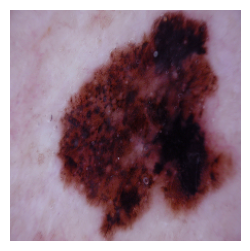

1/1 [==============================] - 0s 40ms/step
Melanoma
Predicted Value: 0.528178
----------------------------------------


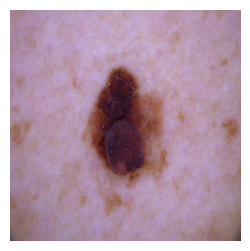

1/1 [==============================] - 0s 37ms/step
Not Melanoma
Predicted Value: 0.9981304
----------------------------------------


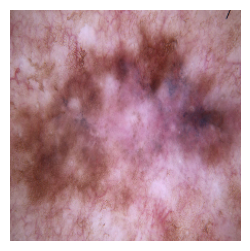

1/1 [==============================] - 0s 43ms/step
Not Melanoma
Predicted Value: 0.8908655
----------------------------------------


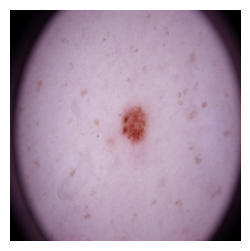

1/1 [==============================] - 0s 65ms/step
Not Melanoma
Predicted Value: 0.666444
----------------------------------------


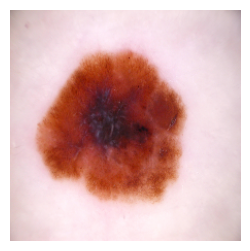

1/1 [==============================] - 0s 66ms/step
Not Melanoma
Predicted Value: 0.9694123
----------------------------------------


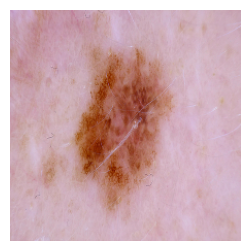

1/1 [==============================] - 0s 73ms/step
Not Melanoma
Predicted Value: 0.9646516
----------------------------------------


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow import keras

model = keras.models.load_model('iv3_model_v2.h5')
# Folder path containing the images
folder_path = 'DermMel/test/Melanoma'

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')]

# Randomly select 10 images from the list
random_images = random.sample(image_files, 10)

# Define the desired smaller image size
smaller_size = (224, 224)

for f in random_images:
    img = cv2.imread(str(f))
    img = cv2.resize(img, smaller_size)  # Resize the image to a smaller size
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=0)

    # Clip the image data to the valid range
    img = np.clip(img, 0, 1)

    # Create a smaller plot for the image
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    ax.axis('off')
    plt.show()

    pred = model.predict(img)
    predicted_value = pred[0][0]

    if predicted_value > 0.56:
        print("Not Melanoma")
    else:
        print("Melanoma")
    print("Predicted Value:", predicted_value)
    print("----------------------------------------")


In [34]:
from tensorflow import keras

model = keras.models.load_model('iv3_model_v2.h5')

In [35]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

112/112 [==============================] - 15s 119ms/step - loss: 0.2009 - accuracy: 0.9225
Test Loss: 0.20094002783298492
Test Accuracy: 0.9224936962127686


In [27]:
from tensorflow import keras

model = keras.models.load_model('dh_model2.h5')

In [28]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

112/112 [==============================] - 15s 118ms/step - loss: 0.2009 - accuracy: 0.9225
Test Loss: 0.20094002783298492
Test Accuracy: 0.9224936962127686
